In [2]:
# importing necessary packages :>

import pandas as pd
import matplotlib.pyplot as plt
from functions import av_err, savetocsv

In [9]:
# importing data

data = pd.read_csv("Data/BGO/Am241/BGO_Am241_final.csv", 
                   nrows = 5000
                  )

Text(0.5, 1.0, 'Counts Recorded per Channel')

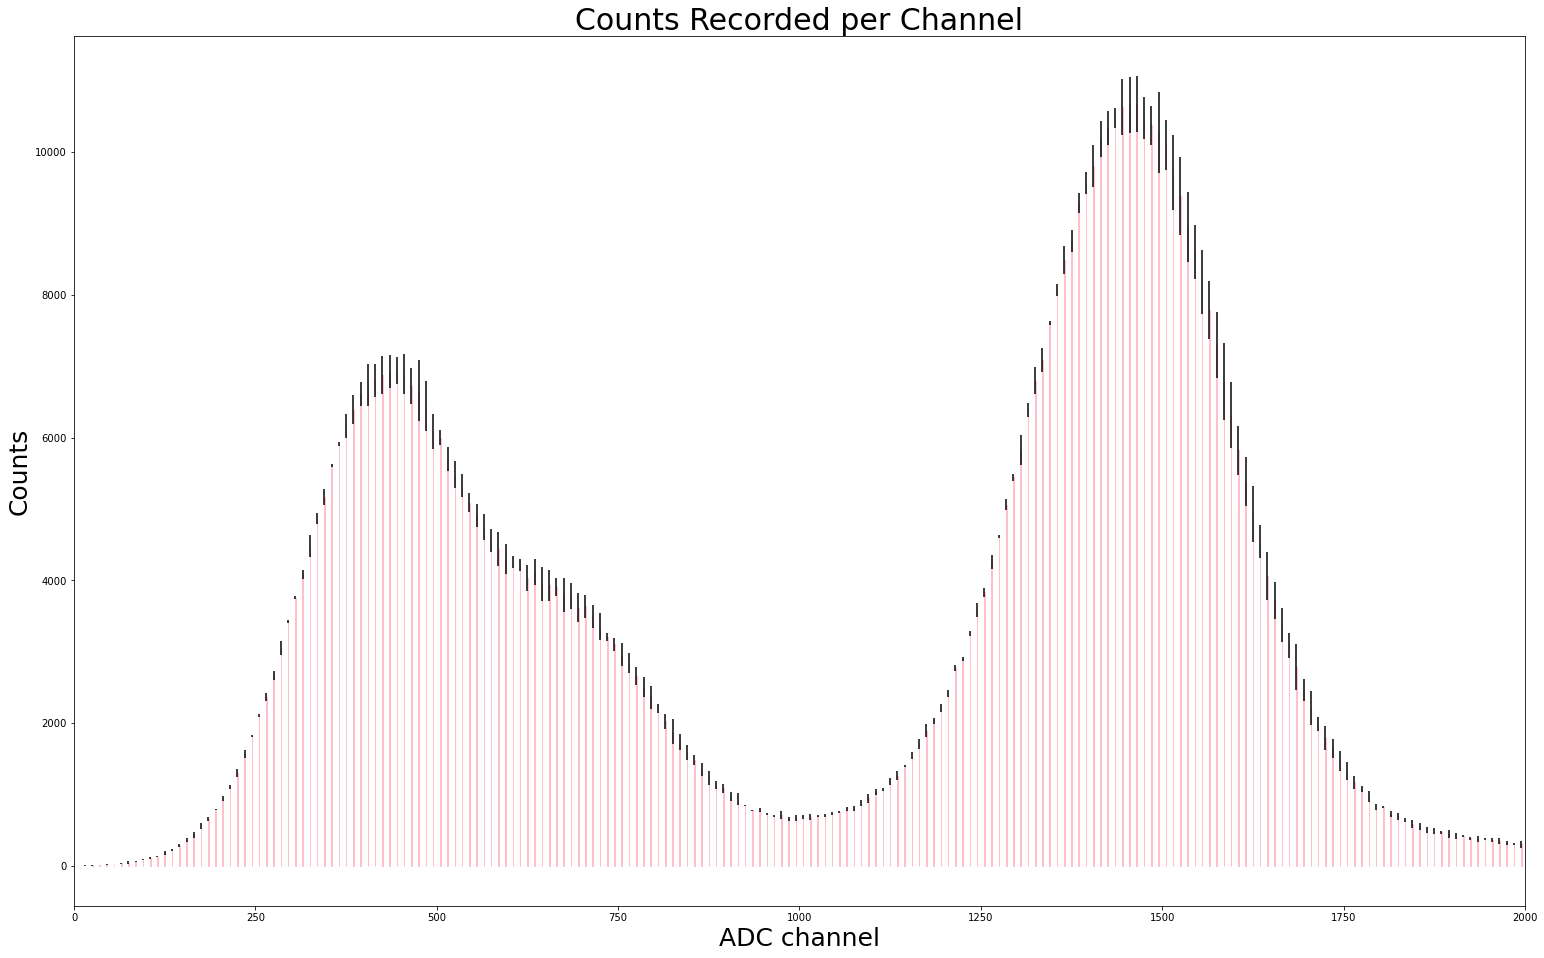

In [13]:
# creating graph
fig, ax = plt.subplots(figsize = (26,16))

# barplotting
ax.bar(x = data['ADC channel'], height = data['average'], width = 0.8, ec = 'pink', yerr = data['error'])
ax.set_xlim(xmin=0, xmax = 2000)

# labeling
plt.xlabel('ADC channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title('Counts Recorded per Channel', fontsize = 30)